In [1]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.2.3
1.20.1


# Tipe data ordinal pada Pandas data Frame

In [5]:
d = {'pelanggan':[11, 12, 13, 14],
     'kepuasan':['baik', 'cukup', 'buruk', 'cukup']}
df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [6]:
from pandas.api.types import CategoricalDtype

tingkat_kepuasan = CategoricalDtype(['buruk', 'cukup', 'baik', 'sangat baik'], ordered=True)

df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [7]:
df = df.sort_values('kepuasan', ascending=True)
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [10]:
df[df['kepuasan'] > 'cukup']

,pelanggan,kepuasan
0,11,baik


# Visualisasi Data pada Pandas Data Frame

In [31]:
# import matplotlib.pyplot as plt

In [3]:
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), columns=cols)
df.head()

,A,B,C,D,E
0,9,4,18,13,7
1,18,18,13,17,7
2,13,12,19,10,7
3,6,9,11,16,7
4,13,9,12,2,15


<AxesSubplot:>

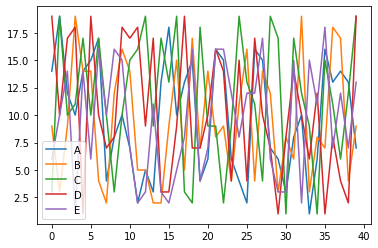

In [11]:
df.plot(kind='line')

<AxesSubplot:>

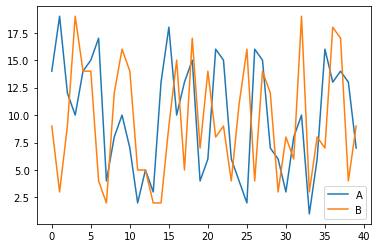

In [12]:
df[['A', 'B']].plot(kind='line')

<AxesSubplot:>

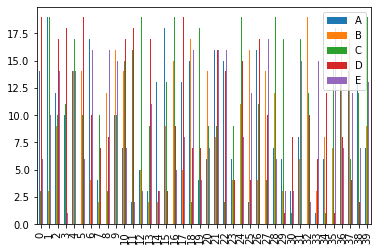

In [13]:
df.plot(kind='bar')

<AxesSubplot:>

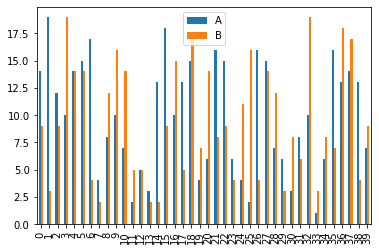

In [14]:
df[['A', 'B']].plot(kind='bar')

<AxesSubplot:>

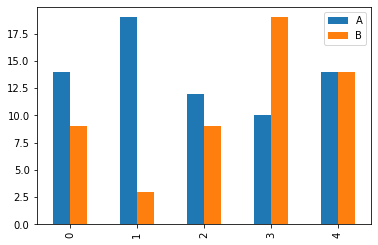

In [18]:
df[['A', 'B']].head().plot(kind='bar')

<AxesSubplot:>

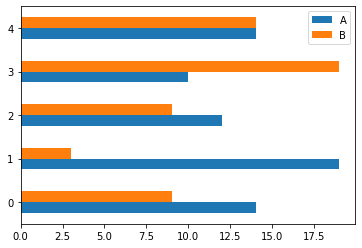

In [19]:
df[['A', 'B']].head().plot(kind='barh')

<AxesSubplot:>

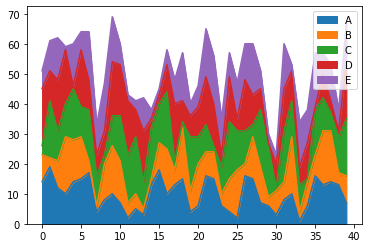

In [20]:
df.plot(kind='area')

<AxesSubplot:>

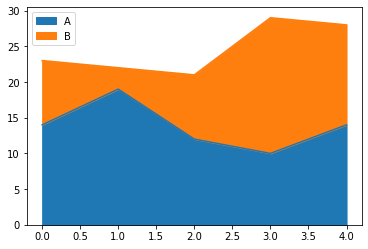

In [21]:
df[['A', 'B']].head().plot(kind='area')

<AxesSubplot:>

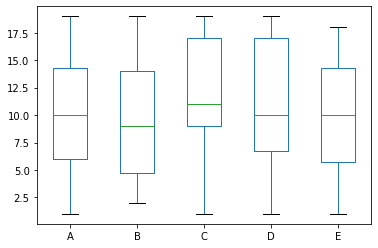

In [22]:
df.plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

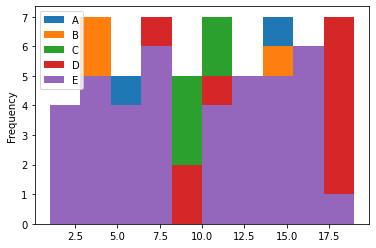

In [23]:
df.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

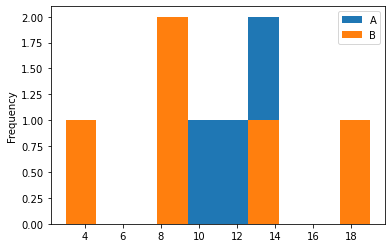

In [27]:
df[['A', 'B']].head().plot(kind='hist')

<AxesSubplot:ylabel='Density'>

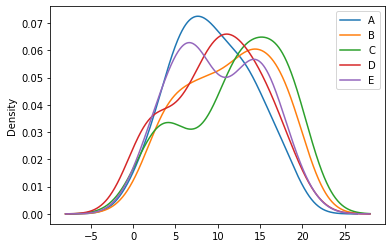

In [5]:
df.plot(kind='kde')

<AxesSubplot:xlabel='A', ylabel='B'>

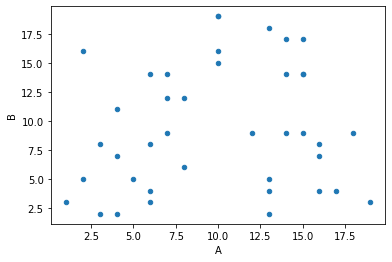

In [34]:
df.plot(x='A', y='B', kind='scatter')

# Nilai Kumulatif pada Pandas Data Frame

In [6]:
d = {'pemain':['Budi', 'Joni', 'Iwan', 'Budi', 'Budi', 'Iwan', 'Asep', 'Joni'],
     'goal':[2, 1, 3, 1, 1, 2, 2, 3]}
df = pd.DataFrame(d)
df

,pemain,goal
0,Budi,2
1,Joni,1
2,Iwan,3
3,Budi,1
4,Budi,1
5,Iwan,2
6,Asep,2
7,Joni,3


In [7]:
df['goal'].cumsum().to_frame()

,goal
0,2
1,3
2,6
3,7
4,8
5,10
6,12
7,15


In [8]:
df['jumlah_gol_kumulatif'] = df['goal'].cumsum()
df

,pemain,goal,jumlah_gol_kumulatif
0,Budi,2,2
1,Joni,1,3
2,Iwan,3,6
3,Budi,1,7
4,Budi,1,8
5,Iwan,2,10
6,Asep,2,12
7,Joni,3,15


In [10]:
df['jumlah_gol_kumulatif_tiap_pemain'] = df.groupby('pemain')['goal'].cumsum()
df

,pemain,goal,jumlah_gol_kumulatif,jumlah_gol_kumulatif_tiap_pemain
0,Budi,2,2,2
1,Joni,1,3,1
2,Iwan,3,6,3
3,Budi,1,7,3
4,Budi,1,8,4
5,Iwan,2,10,5
6,Asep,2,12,2
7,Joni,3,15,4


In [12]:
df['cummax'] = df ['goal'].cummax()
df

,pemain,goal,jumlah_gol_kumulatif,jumlah_gol_kumulatif_tiap_pemain,cummax
0,Budi,2,2,2,2
1,Joni,1,3,1,2
2,Iwan,3,6,3,3
3,Budi,1,7,3,3
4,Budi,1,8,4,3
5,Iwan,2,10,5,3
6,Asep,2,12,2,3
7,Joni,3,15,4,3


In [13]:
df['cummin'] = df ['goal'].cummin()
df

,pemain,goal,jumlah_gol_kumulatif,jumlah_gol_kumulatif_tiap_pemain,cummax,cummin
0,Budi,2,2,2,2,2
1,Joni,1,3,1,2,1
2,Iwan,3,6,3,3,1
3,Budi,1,7,3,3,1
4,Budi,1,8,4,3,1
5,Iwan,2,10,5,3,1
6,Asep,2,12,2,3,1
7,Joni,3,15,4,3,1


In [14]:
df['cumprod'] = df ['goal'].cumprod()
df

,pemain,goal,jumlah_gol_kumulatif,jumlah_gol_kumulatif_tiap_pemain,cummax,cummin,cumprod
0,Budi,2,2,2,2,2,2
1,Joni,1,3,1,2,1,2
2,Iwan,3,6,3,3,1,6
3,Budi,1,7,3,3,1,6
4,Budi,1,8,4,3,1,6
5,Iwan,2,10,5,3,1,12
6,Asep,2,12,2,3,1,24
7,Joni,3,15,4,3,1,72


# Mapping Data Frame dengan applymap

In [35]:
df = pd.DataFrame({'jenis_kelamin':['Pria', 'Wanita', 'lelaki', 'Lelaki', 'perempuan'],
                   'usia':[23, 21, 24, 22, 21],
                   'shift':['pagi', 'siang', 'Malam', 'Siang', 'pagi']})
df

,jenis_kelamin,usia,shift
0,Pria,23,pagi
1,Wanita,21,siang
2,lelaki,24,Malam
3,Lelaki,22,Siang
4,perempuan,21,pagi


In [36]:
df = df.applymap(lambda x: x.lower() if type(x) == str else x)
df

,jenis_kelamin,usia,shift
0,pria,23,pagi
1,wanita,21,siang
2,lelaki,24,malam
3,lelaki,22,siang
4,perempuan,21,pagi


In [37]:
mapping = {'pria':'L',
           'lelaki':'L',
           'wanita':'P',
           'perempuan': 'P',
           'pagi':1,
           'siang':2,
           'malam':3}
df.applymap(mapping.get)

,jenis_kelamin,usia,shift
0,L,None,1
1,P,None,2
2,L,None,3
3,L,None,2
4,P,None,1


In [38]:
df[['jenis_kelamin', 'shift']] = df[['jenis_kelamin', 'shift']].applymap(mapping.get)
df

,jenis_kelamin,usia,shift
0,L,23,1
1,P,21,2
2,L,24,3
3,L,22,2
4,P,21,1


# Memadukan fungsi agregasi dengan transform

In [22]:
d = {'no_nota':[1, 1, 1, 2, 2, 3, 4, 5],
     'kopi':['latte', 'cappuccino', 'espresso', 'latte', 'espresso', 'cappuccino', 'latte', 'espresso'],
     'harga':[50, 60, 80, 150, 120, 60, 100, 40]}
df = pd.DataFrame(d)
df

,no_nota,kopi,harga
0,1,latte,50
1,1,cappuccino,60
2,1,espresso,80
3,2,latte,150
4,2,espresso,120
5,3,cappuccino,60
6,4,latte,100
7,5,espresso,40


In [23]:
df.groupby('no_nota')['harga'].sum().to_frame()

,harga
no_nota,
1,190
2,270
3,60
4,100
5,40


In [33]:
df['total_harga'] = df.groupby('no_nota')['harga'].transform(sum)
df

,no_nota,kopi,harga,total_harga,total_omset
0,1,latte,50,190,300
1,1,cappuccino,60,190,120
2,1,espresso,80,190,240
3,2,latte,150,270,300
4,2,espresso,120,270,240
5,3,cappuccino,60,60,120
6,4,latte,100,100,300
7,5,espresso,40,40,240


In [32]:
df.groupby('kopi')['harga'].sum().to_frame()

,harga
kopi,
cappuccino,120
espresso,240
latte,300


In [34]:
df['total_omset'] = df.groupby('kopi')['harga'].transform(sum)
df

,no_nota,kopi,harga,total_harga,total_omset
0,1,latte,50,190,300
1,1,cappuccino,60,190,120
2,1,espresso,80,190,240
3,2,latte,150,270,300
4,2,espresso,120,270,240
5,3,cappuccino,60,60,120
6,4,latte,100,100,300
7,5,espresso,40,40,240


# Menyatukan kolom pada Pandas Data Frame

In [2]:
data = {'nama': ['bayu', 'indra', 'devi', 'agni'],
        'jenis_kelamin': ['L', 'L', 'P', 'L'],
        'usia': [23, 21, 22, 25]}
df = pd.DataFrame(data)
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,L,25


In [3]:
df['nama'].str.cat(df['jenis_kelamin'], sep=', ').to_frame()

,nama
0,"bayu, L"
1,"indra, L"
2,"devi, P"
3,"agni, L"


In [5]:
df['nama_jk'] = df['nama'].str.cat(df['jenis_kelamin'], sep=', ')
df

,nama,jenis_kelamin,usia,nama_jk
0,bayu,L,23,"bayu, L"
1,indra,L,21,"indra, L"
2,devi,P,22,"devi, P"
3,agni,L,25,"agni, L"


In [7]:
df['nama'].str.cat(df['usia'].astype('str'), sep=' - ').to_frame()

,nama
0,bayu - 23
1,indra - 21
2,devi - 22
3,agni - 25


In [8]:
df['nama_usia'] = df['nama'].str.cat(df['usia'].astype('str'), sep=' - ')
df

,nama,jenis_kelamin,usia,nama_jk,nama_usia
0,bayu,L,23,"bayu, L",bayu - 23
1,indra,L,21,"indra, L",indra - 21
2,devi,P,22,"devi, P",devi - 22
3,agni,L,25,"agni, L",agni - 25


# Seleksi baris dengan banyak kriteria

In [10]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [11]:
df[(df['sex']=='female') & (df['age']>=60) & (df['embarked']=='S') & (df['survived']==1) ]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


In [12]:
df [
    (df['sex']=='female') &
    (df['age']>=60) & 
    (df['embarked']=='S') & 
    (df['survived']==1)
]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


In [13]:
kr1 = df['sex']=='female'
kr2 = df['age']>=60
kr3 = df['embarked']=='S'
kr4 = df['survived']==1

df[kr1 & kr2 & kr3 & kr4]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


# Parameter header dan skiprows pada read_csv

In [ ]:
df = pd.read_csv('./data/iris_error.csv')
df.head(8)

In [ ]:
df = pd.read_csv('./data/iris_error.csv', header=2, skiprows=[5,6])
df.head()

# Mengacak urutan baris pada Data Frame

In [14]:
n_rows = 6
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 5, size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,2,4,1,2,4
1,4,4,1,3,4
2,1,2,2,1,4
3,3,3,3,3,2
4,2,4,2,3,3
5,4,4,3,2,4


In [15]:
 df.sample(frac=1.0, random_state=1)

,A,B,C,D,E
2,1,2,2,1,4
1,4,4,1,3,4
4,2,4,2,3,3
0,2,4,1,2,4
3,3,3,3,3,2
5,4,4,3,2,4


In [22]:
 df.sample(frac=1.0, random_state=1).reset_index(drop=True)

,A,B,C,D,E
0,1,2,2,1,4
1,4,4,1,3,4
2,2,4,2,3,3
3,2,4,1,2,4
4,3,3,3,3,2
5,4,4,3,2,4


In [23]:
df

,A,B,C,D,E
0,2,4,1,2,4
1,4,4,1,3,4
2,1,2,2,1,4
3,3,3,3,3,2
4,2,4,2,3,3
5,4,4,3,2,4


# Akses sekelompok data pada Data Frame terkelompok

In [24]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [25]:
grouped_df = df.groupby('sex')

In [26]:
grouped_df.get_group('female').head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C


In [28]:
grouped_df = df.groupby('survived')

In [29]:
grouped_df.get_group(1).head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.00,0,0,PC 17477,69.3000,B35,C
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.00,0,0,19877,78.8500,NaN,S
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C
